In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score

from tensorflow import keras
from tensorflow.keras import backend as K
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.optimizers import Adam

from sklearn.linear_model import LogisticRegression
#import seaborn as sns


In [4]:
#Question 1

files = ['train.csv', 'test.csv']
df = pd.DataFrame()
for file in files:
    data = pd.read_csv(file)
    df = pd.concat([df, data], axis=0)
df.to_csv('titanic.csv', index=False)

df.head()
df.ndim
df.shape
df.columns

df = df.loc[:, ~df.columns.isin(['Name', 'Ticket','Cabin','PassengerId'])]
df = df.dropna()

df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0.0,3,male,22.0,1,0,7.2500,S
1,1.0,1,female,38.0,1,0,71.2833,C
2,1.0,3,female,26.0,0,0,7.9250,S
3,1.0,1,female,35.0,1,0,53.1000,S
4,0.0,3,male,35.0,0,0,8.0500,S


In [25]:
#Question 1 continued
x = df.drop('Survived',axis=1).copy()
y = df['Survived'].copy()
x.head()
y.unique()

x_encoded = pd.get_dummies(x,columns=['Sex','Embarked'])

# x_np = x.values
# y_np = y.values
x_encoded = (np.asarray(x_encoded).astype('float32'))
y = np.asarray(y).astype('float32')

x_train, x_test, y_train, y_test = train_test_split(x_encoded,y,test_size=0.25,random_state=42)

In [29]:
x_train.shape

(534, 10)

In [7]:
#question2

def make_net2(number_features, 
             dropout=0.0, 
             learning_rate=0.003):
    
    """Make TensorFlow neural net"""
    
    # Clear Tensorflow 
    K.clear_session()
    
    # Set up neural net
    net = Sequential()
    
    
    # Add final sigmoid activation output
    net.add(Dense(1, activation='sigmoid'))    
    
    # Compiling model
    opt = Adam(lr=learning_rate)
    
    net.compile(loss='mean_squared_error', 
                optimizer=opt, 
                metrics=['accuracy'])
    
    return net

model2 = make_net2(10)
#model2.summary()

# def plot_training(history_dict):
#     acc_values = history_dict['accuracy']
#     val_acc_values = history_dict['val_accuracy']
#     epochs = range(1, len(acc_values) + 1)

#     plt.plot(epochs, acc_values, 'bo', label='Training acc')
#     plt.plot(epochs, val_acc_values, 'b', label='Test accuracy')
#     plt.title('Training and validation accuracy')
#     plt.xlabel('Epochs')
#     plt.ylabel('Accuracy')
#     plt.legend()

#     plt.show()

def calculate_accuracy(model, X_train_sc, X_test_sc, y_train, y_test):
    """Calculate and print accuracy of trainign and test data fits"""    
    
    ### Get accuracy of fit to training data
    probability = model.predict(X_train_sc)
    y_pred_train = probability >= 0.5
    y_pred_train = y_pred_train.flatten()
    accuracy_train = np.mean(y_pred_train == y_train)
    
    ### Get accuracy of fit to test data
    probability = model.predict(X_test_sc)
    y_pred_test = probability >= 0.5
    y_pred_test = y_pred_test.flatten()
    accuracy_test = np.mean(y_pred_test == y_test)

    # Show acuracy
    print (f'Training accuracy {accuracy_train:0.3f}')
    print (f'Test accuracy {accuracy_test:0.3f}')
    return y_pred_test
    
# Define network
number_features = x_train.shape[1]
model2 = make_net2(number_features)

x_train=np.asarray(x_train).astype(np.int)

y_train=np.asarray(y_train).astype(np.int)
### Train model (and stote training info in history)
history2 = model2.fit(x_train,
                    y_train,
                    epochs=100,
                    batch_size=64,
                    validation_data=(x_test, y_test),
                    verbose=1)


Metal device set to: Apple M1


/var/folders/lw/7zkwp1j916l4xty0z4xy6mgh0000gn/T/ipykernel_11954/2331109339.py:69: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  x_train=np.asarray(x_train).astype(np.int)
/var/folders/lw/7zkwp1j916l4xty0z4xy6mgh0000gn/T/ipykernel_11954/2331109339.py:71: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review y

Epoch 1/100
9/9 [==============================] - 1s 27ms/step - loss: 0.3911 - accuracy: 0.6086 - val_loss: 0.4438 - val_accuracy: 0.5562
Epoch 2/100
9/9 [==============================] - 0s 11ms/step - loss: 0.3911 - accuracy: 0.6086 - val_loss: 0.4438 - val_accuracy: 0.5562
Epoch 3/100
9/9 [==============================] - 0s 10ms/step - loss: 0.3911 - accuracy: 0.6086 - val_loss: 0.4438 - val_accuracy: 0.5562
Epoch 4/100
9/9 [==============================] - 0s 12ms/step - loss: 0.3911 - accuracy: 0.6086 - val_loss: 0.4438 - val_accuracy: 0.5562
Epoch 5/100
9/9 [==============================] - 0s 17ms/step - loss: 0.3910 - accuracy: 0.6086 - val_loss: 0.4438 - val_accuracy: 0.5562
Epoch 6/100
9/9 [==============================] - 0s 20ms/step - loss: 0.3910 - accuracy: 0.6086 - val_loss: 0.4438 - val_accuracy: 0.5562
Epoch 7/100
9/9 [==============================] - 0s 18ms/step - loss: 0.3910 - accuracy: 0.6086 - val_loss: 0.4437 - val_accuracy: 0.5562
Epoch 8/100
9/9 [===

9/9 [==============================] - 0s 12ms/step - loss: 0.3065 - accuracy: 0.6124 - val_loss: 0.3338 - val_accuracy: 0.5787
Epoch 60/100
9/9 [==============================] - 0s 11ms/step - loss: 0.3011 - accuracy: 0.6124 - val_loss: 0.3217 - val_accuracy: 0.5730
Epoch 61/100
9/9 [==============================] - 0s 12ms/step - loss: 0.2873 - accuracy: 0.6142 - val_loss: 0.2865 - val_accuracy: 0.5899
Epoch 62/100
9/9 [==============================] - 0s 12ms/step - loss: 0.2416 - accuracy: 0.6573 - val_loss: 0.2401 - val_accuracy: 0.7022
Epoch 63/100
9/9 [==============================] - 0s 12ms/step - loss: 0.2189 - accuracy: 0.7022 - val_loss: 0.2334 - val_accuracy: 0.6798
Epoch 64/100
9/9 [==============================] - 0s 12ms/step - loss: 0.2096 - accuracy: 0.7266 - val_loss: 0.2317 - val_accuracy: 0.6573
Epoch 65/100
9/9 [==============================] - 0s 11ms/step - loss: 0.2095 - accuracy: 0.7210 - val_loss: 0.2308 - val_accuracy: 0.6742
Epoch 66/100
9/9 [========

6/6 [==============================] - 0s 4ms/step
Training accuracy 0.762
Test accuracy 0.753


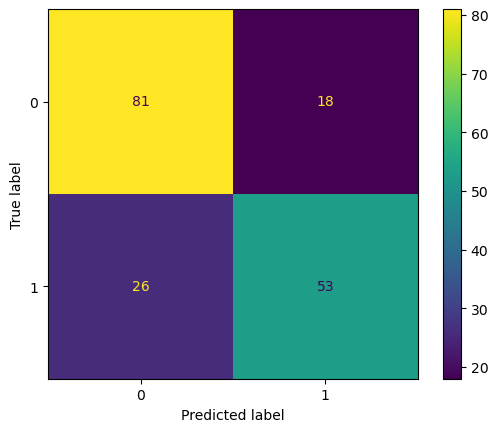

In [8]:
#question 2 continued

pred2 = calculate_accuracy(model2,x_train, x_test, y_train, y_test)
#cm = Confusion_Matirx(y_test,pred2)
disp = ConfusionMatrixDisplay(confusion_matrix(y_test,pred2))
disp.plot()


In [9]:
#question 3

def make_net3(number_features, 
             hidden_layers=1, 
             hidden_layer_neurones=0, 
             dropout=0.0, 
             learning_rate=0.003):
    
    """Make TensorFlow neural net"""
    
    # Clear Tensorflow 
    K.clear_session()
    
    # Set up neural net
    net = Sequential()
    
    
    # Add final sigmoid activation output
    net.add(Dense(1, activation='sigmoid'))    
    
    # Compiling model
    opt = Adam(lr=learning_rate)
    
    net.compile(loss='binary_crossentropy', 
                optimizer=opt, 
                metrics=['accuracy'])
    
    return net

model3 = make_net3(10)
#model3.summary()

# def plot_training(history_dict):
#     acc_values = history_dict['accuracy']
#     val_acc_values = history_dict['val_accuracy']
#     epochs = range(1, len(acc_values) + 1)

#     plt.plot(epochs, acc_values, 'bo', label='Training acc')
#     plt.plot(epochs, val_acc_values, 'b', label='Test accuracy')
#     plt.title('Training and validation accuracy')
#     plt.xlabel('Epochs')
#     plt.ylabel('Accuracy')
#     plt.legend()

#     plt.show()

def calculate_accuracy(model, X_train_sc, X_test_sc, y_train, y_test):
    """Calculate and print accuracy of trainign and test data fits"""    
    
    ### Get accuracy of fit to training data
    probability = model.predict(X_train_sc)
    y_pred_train = probability >= 0.5
    y_pred_train = y_pred_train.flatten()
    accuracy_train = np.mean(y_pred_train == y_train)
    
    ### Get accuracy of fit to test data
    probability = model.predict(X_test_sc)
    y_pred_test = probability >= 0.5
    y_pred_test = y_pred_test.flatten()
    accuracy_test = np.mean(y_pred_test == y_test)

    # Show acuracy
    print (f'Training accuracy {accuracy_train:0.3f}')
    print (f'Test accuracy {accuracy_test:0.3f}')
    return y_pred_test
# Define network
number_features = x_train.shape[1]
model3 = make_net3(number_features)

x_train=np.asarray(x_train).astype(np.int)

y_train=np.asarray(y_train).astype(np.int)
### Train model (and stote training info in history)
history3 = model3.fit(x_train,
                    y_train,
                    epochs=200,
                    batch_size=64,
                    validation_data=(x_test, y_test),
                    verbose=1)


Epoch 1/200


/var/folders/lw/7zkwp1j916l4xty0z4xy6mgh0000gn/T/ipykernel_11954/174079600.py:70: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  x_train=np.asarray(x_train).astype(np.int)
/var/folders/lw/7zkwp1j916l4xty0z4xy6mgh0000gn/T/ipykernel_11954/174079600.py:72: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review you

9/9 [==============================] - 1s 34ms/step - loss: 17.6628 - accuracy: 0.3914 - val_loss: 18.3939 - val_accuracy: 0.4438
Epoch 2/200
9/9 [==============================] - 0s 13ms/step - loss: 17.3522 - accuracy: 0.3914 - val_loss: 18.0690 - val_accuracy: 0.4438
Epoch 3/200
9/9 [==============================] - 0s 12ms/step - loss: 17.0355 - accuracy: 0.3914 - val_loss: 17.7465 - val_accuracy: 0.4438
Epoch 4/200
9/9 [==============================] - 0s 13ms/step - loss: 16.7252 - accuracy: 0.3914 - val_loss: 17.4188 - val_accuracy: 0.4438
Epoch 5/200
9/9 [==============================] - 0s 15ms/step - loss: 16.4103 - accuracy: 0.3914 - val_loss: 17.0928 - val_accuracy: 0.4438
Epoch 6/200
9/9 [==============================] - 0s 13ms/step - loss: 16.1014 - accuracy: 0.3914 - val_loss: 16.7668 - val_accuracy: 0.4438
Epoch 7/200
9/9 [==============================] - 0s 14ms/step - loss: 15.7956 - accuracy: 0.3914 - val_loss: 16.4401 - val_accuracy: 0.4438
Epoch 8/200
9/9 [=

Epoch 59/200
9/9 [==============================] - 0s 10ms/step - loss: 1.3572 - accuracy: 0.5449 - val_loss: 1.4101 - val_accuracy: 0.4944
Epoch 60/200
9/9 [==============================] - 0s 10ms/step - loss: 1.2636 - accuracy: 0.5581 - val_loss: 1.3300 - val_accuracy: 0.5056
Epoch 61/200
9/9 [==============================] - 0s 9ms/step - loss: 1.1973 - accuracy: 0.5543 - val_loss: 1.2656 - val_accuracy: 0.5169
Epoch 62/200
9/9 [==============================] - 0s 9ms/step - loss: 1.1414 - accuracy: 0.5581 - val_loss: 1.2214 - val_accuracy: 0.5112
Epoch 63/200
9/9 [==============================] - 0s 10ms/step - loss: 1.1035 - accuracy: 0.5637 - val_loss: 1.1913 - val_accuracy: 0.5056
Epoch 64/200
9/9 [==============================] - 0s 9ms/step - loss: 1.0720 - accuracy: 0.5674 - val_loss: 1.1686 - val_accuracy: 0.5112
Epoch 65/200
9/9 [==============================] - 0s 9ms/step - loss: 1.0484 - accuracy: 0.5768 - val_loss: 1.1470 - val_accuracy: 0.5112
Epoch 66/200
9/9 

9/9 [==============================] - 0s 11ms/step - loss: 0.7191 - accuracy: 0.6723 - val_loss: 0.8529 - val_accuracy: 0.6067
Epoch 118/200
9/9 [==============================] - 0s 11ms/step - loss: 0.7163 - accuracy: 0.6760 - val_loss: 0.8507 - val_accuracy: 0.6067
Epoch 119/200
9/9 [==============================] - 0s 11ms/step - loss: 0.7134 - accuracy: 0.6779 - val_loss: 0.8485 - val_accuracy: 0.6124
Epoch 120/200
9/9 [==============================] - 0s 11ms/step - loss: 0.7107 - accuracy: 0.6779 - val_loss: 0.8464 - val_accuracy: 0.6180
Epoch 121/200
9/9 [==============================] - 0s 14ms/step - loss: 0.7086 - accuracy: 0.6835 - val_loss: 0.8453 - val_accuracy: 0.6236
Epoch 122/200
9/9 [==============================] - 0s 12ms/step - loss: 0.7056 - accuracy: 0.6798 - val_loss: 0.8421 - val_accuracy: 0.6236
Epoch 123/200
9/9 [==============================] - 0s 13ms/step - loss: 0.7034 - accuracy: 0.6835 - val_loss: 0.8393 - val_accuracy: 0.6236
Epoch 124/200
9/9 [=

Epoch 175/200
9/9 [==============================] - 0s 9ms/step - loss: 0.5988 - accuracy: 0.7116 - val_loss: 0.7272 - val_accuracy: 0.6404
Epoch 176/200
9/9 [==============================] - 0s 9ms/step - loss: 0.5967 - accuracy: 0.7135 - val_loss: 0.7261 - val_accuracy: 0.6348
Epoch 177/200
9/9 [==============================] - 0s 11ms/step - loss: 0.5954 - accuracy: 0.7154 - val_loss: 0.7252 - val_accuracy: 0.6348
Epoch 178/200
9/9 [==============================] - 0s 10ms/step - loss: 0.5938 - accuracy: 0.7135 - val_loss: 0.7234 - val_accuracy: 0.6348
Epoch 179/200
9/9 [==============================] - 0s 9ms/step - loss: 0.5923 - accuracy: 0.7154 - val_loss: 0.7197 - val_accuracy: 0.6404
Epoch 180/200
9/9 [==============================] - 0s 9ms/step - loss: 0.5911 - accuracy: 0.7135 - val_loss: 0.7184 - val_accuracy: 0.6404
Epoch 181/200
9/9 [==============================] - 0s 10ms/step - loss: 0.5890 - accuracy: 0.7116 - val_loss: 0.7152 - val_accuracy: 0.6404
Epoch 182/

6/6 [==============================] - 0s 4ms/step
Training accuracy 0.717
Test accuracy 0.652


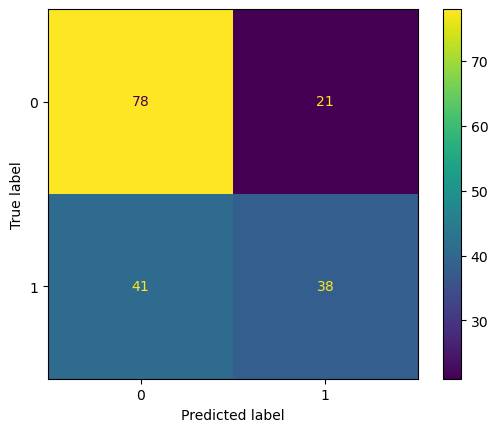

In [10]:
#question continued
pred3 = calculate_accuracy(model3,x_train, x_test, y_train, y_test)
disp = ConfusionMatrixDisplay(confusion_matrix(y_test,pred3))
disp.plot()


In [11]:
#Q4 logistic regression

log_reg = LogisticRegression()
log_reg.fit(x_train,y_train)

/Users/vishnuteja/miniconda3/envs/tensorflow/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

Training accuracy 0.807
Test accuracy 0.792


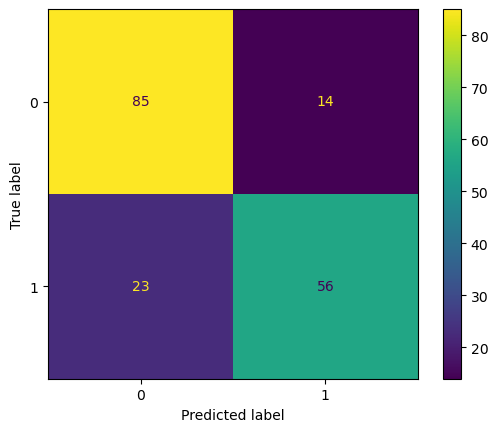

In [14]:
y_pred = log_reg.predict(x_test)
pred4 = calculate_accuracy(log_reg,x_train, x_test, y_train, y_test)
disp = ConfusionMatrixDisplay(confusion_matrix(y_test,pred4))
disp.plot()

In [15]:
print("After comparing the accuracies, the model in question better resembles the logistice regression model")

After comparing the accuracies, the model in question better resembles the logistice regression model


In [42]:
#question 3

def make_net5(number_features, 
             hidden_layers=1, 
             hidden_layer_neurones=3, 
             dropout=0.0, 
             learning_rate=0.003):
    
    """Make TensorFlow neural net"""
    
    # Clear Tensorflow 
    K.clear_session()
    
    # Set up neural net
    net = Sequential()
    
    # Add hidden hidden_layers using a loop
    for i in range(hidden_layers+1):
        # Add fully connected layer with ReLu activation
        net.add(Dense(
            hidden_layer_neurones, 
            input_dim=number_features,
            activation='sigmoid'))
        # Add droput layer
        net.add(Dropout(dropout))
    
    # Add final sigmoid activation output
    net.add(Dense(1, activation='sigmoid'))    
    
    # Compiling model
    opt = Adam(lr=learning_rate)
    
    net.compile(loss='binary_crossentropy', 
                optimizer=opt, 
                metrics=['accuracy'])
    
    return net

model5 = make_net5(10)
#model3.summary()

# def plot_training(history_dict):
#     acc_values = history_dict['accuracy']
#     val_acc_values = history_dict['val_accuracy']
#     epochs = range(1, len(acc_values) + 1)

#     plt.plot(epochs, acc_values, 'bo', label='Training acc')
#     plt.plot(epochs, val_acc_values, 'b', label='Test accuracy')
#     plt.title('Training and validation accuracy')
#     plt.xlabel('Epochs')
#     plt.ylabel('Accuracy')
#     plt.legend()

#     plt.show()

def calculate_accuracy(model, X_train_sc, X_test_sc, y_train, y_test):
    """Calculate and print accuracy of trainign and test data fits"""    
    
    ### Get accuracy of fit to training data
    probability = model.predict(X_train_sc)
    y_pred_train = probability >= 0.5
    y_pred_train = y_pred_train.flatten()
    accuracy_train = np.mean(y_pred_train == y_train)
    
    ### Get accuracy of fit to test data
    probability = model.predict(X_test_sc)
    y_pred_test = probability >= 0.5
    y_pred_test = y_pred_test.flatten()
    accuracy_test = np.mean(y_pred_test == y_test)

    # Show acuracy
    print (f'Training accuracy {accuracy_train:0.3f}')
    print (f'Test accuracy {accuracy_test:0.3f}')
    return y_pred_test
# Define network
number_features = x_train.shape[1]
model5 = make_net5(number_features)

x_train=np.asarray(x_train).astype(np.int)

y_train=np.asarray(y_train).astype(np.int)
### Train model (and stote training info in history)
history5 = model5.fit(x_train,
                    y_train,
                    epochs=200,
                    batch_size=64,
                    validation_data=(x_test, y_test),
                    verbose=1)


Epoch 1/200


/var/folders/lw/7zkwp1j916l4xty0z4xy6mgh0000gn/T/ipykernel_11954/1411032668.py:79: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  x_train=np.asarray(x_train).astype(np.int)
/var/folders/lw/7zkwp1j916l4xty0z4xy6mgh0000gn/T/ipykernel_11954/1411032668.py:81: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review y

9/9 [==============================] - 1s 46ms/step - loss: 0.8124 - accuracy: 0.3914 - val_loss: 0.7696 - val_accuracy: 0.4438
Epoch 2/200
9/9 [==============================] - 0s 15ms/step - loss: 0.8057 - accuracy: 0.3914 - val_loss: 0.7638 - val_accuracy: 0.4438
Epoch 3/200
9/9 [==============================] - 0s 14ms/step - loss: 0.7988 - accuracy: 0.3914 - val_loss: 0.7582 - val_accuracy: 0.4438
Epoch 4/200
9/9 [==============================] - 0s 17ms/step - loss: 0.7922 - accuracy: 0.3914 - val_loss: 0.7530 - val_accuracy: 0.4438
Epoch 5/200
9/9 [==============================] - 0s 14ms/step - loss: 0.7859 - accuracy: 0.3914 - val_loss: 0.7481 - val_accuracy: 0.4438
Epoch 6/200
9/9 [==============================] - 0s 16ms/step - loss: 0.7795 - accuracy: 0.3914 - val_loss: 0.7436 - val_accuracy: 0.4438
Epoch 7/200
9/9 [==============================] - 0s 15ms/step - loss: 0.7734 - accuracy: 0.3914 - val_loss: 0.7393 - val_accuracy: 0.4438
Epoch 8/200
9/9 [===============

9/9 [==============================] - 0s 13ms/step - loss: 0.6518 - accuracy: 0.6086 - val_loss: 0.6721 - val_accuracy: 0.5562
Epoch 60/200
9/9 [==============================] - 0s 11ms/step - loss: 0.6512 - accuracy: 0.6086 - val_loss: 0.6718 - val_accuracy: 0.5562
Epoch 61/200
9/9 [==============================] - 0s 11ms/step - loss: 0.6506 - accuracy: 0.6086 - val_loss: 0.6715 - val_accuracy: 0.5562
Epoch 62/200
9/9 [==============================] - 0s 11ms/step - loss: 0.6500 - accuracy: 0.6086 - val_loss: 0.6712 - val_accuracy: 0.5562
Epoch 63/200
9/9 [==============================] - 0s 12ms/step - loss: 0.6495 - accuracy: 0.6086 - val_loss: 0.6708 - val_accuracy: 0.5562
Epoch 64/200
9/9 [==============================] - 0s 11ms/step - loss: 0.6490 - accuracy: 0.6086 - val_loss: 0.6707 - val_accuracy: 0.5562
Epoch 65/200
9/9 [==============================] - 0s 11ms/step - loss: 0.6484 - accuracy: 0.6086 - val_loss: 0.6703 - val_accuracy: 0.5562
Epoch 66/200
9/9 [========

9/9 [==============================] - 0s 13ms/step - loss: 0.6179 - accuracy: 0.6086 - val_loss: 0.6511 - val_accuracy: 0.5562
Epoch 118/200
9/9 [==============================] - 0s 11ms/step - loss: 0.6172 - accuracy: 0.6086 - val_loss: 0.6505 - val_accuracy: 0.5562
Epoch 119/200
9/9 [==============================] - 0s 11ms/step - loss: 0.6166 - accuracy: 0.6086 - val_loss: 0.6499 - val_accuracy: 0.5562
Epoch 120/200
9/9 [==============================] - 0s 11ms/step - loss: 0.6158 - accuracy: 0.6086 - val_loss: 0.6495 - val_accuracy: 0.5562
Epoch 121/200
9/9 [==============================] - 0s 11ms/step - loss: 0.6152 - accuracy: 0.6086 - val_loss: 0.6489 - val_accuracy: 0.5562
Epoch 122/200
9/9 [==============================] - 0s 11ms/step - loss: 0.6145 - accuracy: 0.6086 - val_loss: 0.6485 - val_accuracy: 0.5562
Epoch 123/200
9/9 [==============================] - 0s 11ms/step - loss: 0.6137 - accuracy: 0.6086 - val_loss: 0.6479 - val_accuracy: 0.5562
Epoch 124/200
9/9 [=

Epoch 175/200
9/9 [==============================] - 0s 14ms/step - loss: 0.5735 - accuracy: 0.7060 - val_loss: 0.6175 - val_accuracy: 0.6517
Epoch 176/200
9/9 [==============================] - 0s 13ms/step - loss: 0.5727 - accuracy: 0.7041 - val_loss: 0.6168 - val_accuracy: 0.6517
Epoch 177/200
9/9 [==============================] - 0s 11ms/step - loss: 0.5720 - accuracy: 0.7079 - val_loss: 0.6162 - val_accuracy: 0.6517
Epoch 178/200
9/9 [==============================] - 0s 11ms/step - loss: 0.5712 - accuracy: 0.7060 - val_loss: 0.6157 - val_accuracy: 0.6461
Epoch 179/200
9/9 [==============================] - 0s 15ms/step - loss: 0.5703 - accuracy: 0.7097 - val_loss: 0.6157 - val_accuracy: 0.6517
Epoch 180/200
9/9 [==============================] - 0s 15ms/step - loss: 0.5695 - accuracy: 0.7172 - val_loss: 0.6153 - val_accuracy: 0.6573
Epoch 181/200
9/9 [==============================] - 0s 13ms/step - loss: 0.5687 - accuracy: 0.7172 - val_loss: 0.6142 - val_accuracy: 0.6517
Epoch 

In [35]:
x_train.shape[1]

10

6/6 [==============================] - 0s 5ms/step
Training accuracy 0.745
Test accuracy 0.697


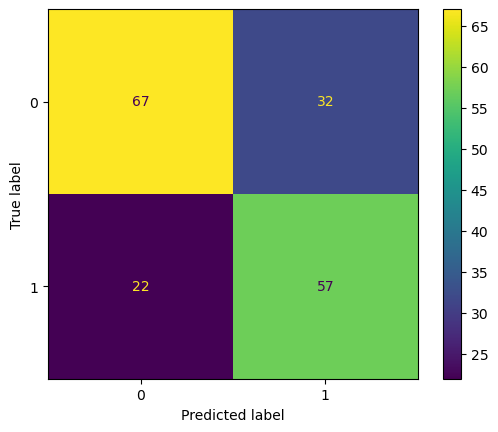

In [43]:
pred5 = calculate_accuracy(model5, x_train, x_test, y_train, y_test)
disp = ConfusionMatrixDisplay(confusion_matrix(y_test,pred5))
disp.plot()

In [40]:
def make_net6(number_features, 
             hidden_layers=1, 
             hidden_layer_neurones=3, 
             dropout=0.0, 
             learning_rate=0.003):
    
    """Make TensorFlow neural net"""
    
    # Clear Tensorflow 
    K.clear_session()
    
    # Set up neural net
    net = Sequential()
    
    # Add hidden hidden_layers using a loop
    for i in range(hidden_layers+1):
        # Add fully connected layer with ReLu activation
        net.add(Dense(
            hidden_layer_neurones, 
            input_dim=number_features,
            activation='relu'))
        # Add droput layer
        net.add(Dropout(dropout))
    
    # Add final sigmoid activation output
    net.add(Dense(1, activation='sigmoid'))    
    
    # Compiling model
    opt = Adam(lr=learning_rate)
    
    net.compile(loss='binary_crossentropy', 
                optimizer=opt, 
                metrics=['accuracy'])
    
    return net

model6 = make_net6(11)
model6.summary()

def plot_training(history_dict):
    acc_values = history_dict['accuracy']
    val_acc_values = history_dict['val_accuracy']
    epochs = range(1, len(acc_values) + 1)

    plt.plot(epochs, acc_values, 'bo', label='Training acc')
    plt.plot(epochs, val_acc_values, 'b', label='Test accuracy')
    plt.title('Training and validation accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.show()

def calculate_accuracy(model, X_train_sc, X_test_sc, y_train, y_test):
    """Calculate and print accuracy of trainign and test data fits"""    
    
    ### Get accuracy of fit to training data
    probability = model.predict(X_train_sc)
    y_pred_train = probability >= 0.5
    y_pred_train = y_pred_train.flatten()
    accuracy_train = np.mean(y_pred_train == y_train)
    
    ### Get accuracy of fit to test data
    probability = model.predict(X_test_sc)
    y_pred_test = probability >= 0.5
    y_pred_test = y_pred_test.flatten()
    accuracy_test = np.mean(y_pred_test == y_test)

    # Show acuracy
    print (f'Training accuracy {accuracy_train:0.3f}')
    print (f'Test accuracy {accuracy_test:0.3f}')
    return y_pred_test

# Define network
number_features = x_train.shape[1]
model6 = make_net6(number_features)

x_train=np.asarray(x_train).astype(np.int)

y_train=np.asarray(y_train).astype(np.int)
### Train model (and stote training info in history)
history6 = model6.fit(x_train,
                    y_train,
                    epochs=200,
                    batch_size=64,
                    validation_data=(x_test, y_test),
                    verbose=1)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 3)                 36        
                                                                 
 dropout (Dropout)           (None, 3)                 0         
                                                                 
 dense_1 (Dense)             (None, 3)                 12        
                                                                 
 dropout_1 (Dropout)         (None, 3)                 0         
                                                                 
 dense_2 (Dense)             (None, 1)                 4         
                                                                 
Total params: 52
Trainable params: 52
Non-trainable params: 0
_________________________________________________________________


Epoch 1/200


/var/folders/lw/7zkwp1j916l4xty0z4xy6mgh0000gn/T/ipykernel_11954/786648204.py:78: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  x_train=np.asarray(x_train).astype(np.int)
/var/folders/lw/7zkwp1j916l4xty0z4xy6mgh0000gn/T/ipykernel_11954/786648204.py:80: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review you

9/9 [==============================] - 1s 40ms/step - loss: 0.6927 - accuracy: 0.6086 - val_loss: 0.6928 - val_accuracy: 0.5562
Epoch 2/200
9/9 [==============================] - 0s 16ms/step - loss: 0.6917 - accuracy: 0.6086 - val_loss: 0.6921 - val_accuracy: 0.5562
Epoch 3/200
9/9 [==============================] - 0s 15ms/step - loss: 0.6904 - accuracy: 0.6086 - val_loss: 0.6914 - val_accuracy: 0.5562
Epoch 4/200
9/9 [==============================] - 0s 12ms/step - loss: 0.6890 - accuracy: 0.6086 - val_loss: 0.6907 - val_accuracy: 0.5562
Epoch 5/200
9/9 [==============================] - 0s 12ms/step - loss: 0.6875 - accuracy: 0.6086 - val_loss: 0.6900 - val_accuracy: 0.5562
Epoch 6/200
9/9 [==============================] - 0s 18ms/step - loss: 0.6861 - accuracy: 0.6086 - val_loss: 0.6894 - val_accuracy: 0.5562
Epoch 7/200
9/9 [==============================] - 0s 13ms/step - loss: 0.6849 - accuracy: 0.6086 - val_loss: 0.6889 - val_accuracy: 0.5562
Epoch 8/200
9/9 [===============

9/9 [==============================] - 0s 11ms/step - loss: 0.5970 - accuracy: 0.7060 - val_loss: 0.6455 - val_accuracy: 0.6348
Epoch 60/200
9/9 [==============================] - 0s 11ms/step - loss: 0.5965 - accuracy: 0.7041 - val_loss: 0.6451 - val_accuracy: 0.6348
Epoch 61/200
9/9 [==============================] - 0s 11ms/step - loss: 0.5963 - accuracy: 0.7041 - val_loss: 0.6445 - val_accuracy: 0.6292
Epoch 62/200
9/9 [==============================] - 0s 11ms/step - loss: 0.5957 - accuracy: 0.7060 - val_loss: 0.6441 - val_accuracy: 0.6292
Epoch 63/200
9/9 [==============================] - 0s 11ms/step - loss: 0.5952 - accuracy: 0.7060 - val_loss: 0.6440 - val_accuracy: 0.6292
Epoch 64/200
9/9 [==============================] - 0s 11ms/step - loss: 0.5948 - accuracy: 0.7060 - val_loss: 0.6438 - val_accuracy: 0.6292
Epoch 65/200
9/9 [==============================] - 0s 11ms/step - loss: 0.5946 - accuracy: 0.7004 - val_loss: 0.6435 - val_accuracy: 0.6404
Epoch 66/200
9/9 [========

9/9 [==============================] - 0s 11ms/step - loss: 0.5709 - accuracy: 0.7097 - val_loss: 0.6267 - val_accuracy: 0.6404
Epoch 118/200
9/9 [==============================] - 0s 14ms/step - loss: 0.5700 - accuracy: 0.7079 - val_loss: 0.6261 - val_accuracy: 0.6348
Epoch 119/200
9/9 [==============================] - 0s 13ms/step - loss: 0.5695 - accuracy: 0.7097 - val_loss: 0.6256 - val_accuracy: 0.6404
Epoch 120/200
9/9 [==============================] - 0s 13ms/step - loss: 0.5697 - accuracy: 0.7060 - val_loss: 0.6254 - val_accuracy: 0.6348
Epoch 121/200
9/9 [==============================] - 0s 11ms/step - loss: 0.5687 - accuracy: 0.7079 - val_loss: 0.6250 - val_accuracy: 0.6404
Epoch 122/200
9/9 [==============================] - 0s 15ms/step - loss: 0.5683 - accuracy: 0.7097 - val_loss: 0.6248 - val_accuracy: 0.6404
Epoch 123/200
9/9 [==============================] - 0s 12ms/step - loss: 0.5676 - accuracy: 0.7079 - val_loss: 0.6245 - val_accuracy: 0.6404
Epoch 124/200
9/9 [=

Epoch 175/200
9/9 [==============================] - 0s 11ms/step - loss: 0.5383 - accuracy: 0.7172 - val_loss: 0.6033 - val_accuracy: 0.6742
Epoch 176/200
9/9 [==============================] - 0s 11ms/step - loss: 0.5376 - accuracy: 0.7135 - val_loss: 0.6025 - val_accuracy: 0.6742
Epoch 177/200
9/9 [==============================] - 0s 12ms/step - loss: 0.5369 - accuracy: 0.7172 - val_loss: 0.6020 - val_accuracy: 0.6742
Epoch 178/200
9/9 [==============================] - 0s 12ms/step - loss: 0.5361 - accuracy: 0.7172 - val_loss: 0.6014 - val_accuracy: 0.6742
Epoch 179/200
9/9 [==============================] - 0s 11ms/step - loss: 0.5357 - accuracy: 0.7172 - val_loss: 0.6005 - val_accuracy: 0.6685
Epoch 180/200
9/9 [==============================] - 0s 11ms/step - loss: 0.5350 - accuracy: 0.7172 - val_loss: 0.5996 - val_accuracy: 0.6685
Epoch 181/200
9/9 [==============================] - 0s 11ms/step - loss: 0.5335 - accuracy: 0.7210 - val_loss: 0.5987 - val_accuracy: 0.6685
Epoch 

6/6 [==============================] - 0s 7ms/step
Training accuracy 0.749
Test accuracy 0.719


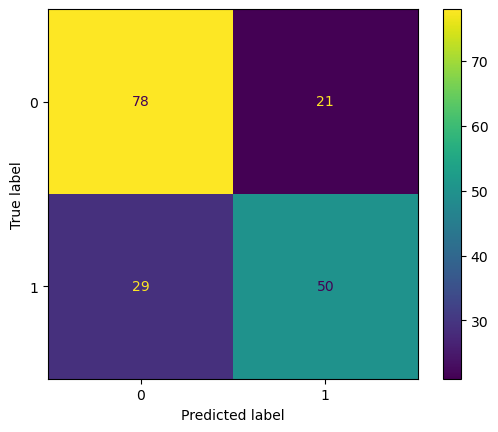

In [41]:
pred6 = calculate_accuracy(model6,x_train, x_test, y_train, y_test)
disp = ConfusionMatrixDisplay(confusion_matrix(y_test,pred6))
disp.plot()